# ICA

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
data_file = './data/normalized_proteomics_pivot.csv'
data_file = './data/normalized_proteomics_pivot_c0-c6.csv'
omics = pd.read_csv(data_file, index_col=0)
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


### Drop wierd runs from C3

In [3]:
omics = omics.drop(['PP_0815_PP_1317-R1_c3',
                    'PP_0815_PP_1317-R2_c3',
                    'PP_0815_PP_1317-R3_c3',
                    'PP_1317-R1_c3',
                    'PP_1317-R2_c3',
                    'PP_1317-R3_c3'
                   ]
                  )

## Merge means by replicate

### Drop rows/columns with missing data

In [4]:
omics.loc[omics['isoprenol'].isna(), 'isoprenol']
omics = omics.dropna(axis = 0, how = 'any', subset=['isoprenol'])
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


In [5]:
omics = omics.dropna(axis = 1, how = 'any')
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


### Merge by replicate

In [6]:
omics_mean = omics.copy()
omics_mean['cycle'] = [x[-1] for x in omics_mean.index.values]
omics_mean['cycle'].value_counts()
# omics_mean['line_name'] = omics_mean.apply(lambda x: x.index.values.split('-')[0], axis = 1)
omics_mean['line_name'] = [f"{x.split('-')[0]}_c{x[-1]}" for x in omics_mean.index.values]
omics_mean['is_control'] = ['ontrol' in x for x in omics_mean['line_name']]
omics_mean.loc[omics_mean['is_control'], 'line_name'] = omics_mean.loc[
    omics_mean['is_control'], 'line_name'].apply(lambda x: f'Control_c{x[-1]}')
omics_metadata = omics_mean[['cycle', 'is_control']].copy()
omics_mean = omics_mean.drop(['cycle', 'is_control'], axis = 1)

omics_mean = omics_mean.groupby('line_name').mean()
omics_mean.shape

(472, 1646)

In [7]:
print(f"Number of measurements per cycle:\n{omics_metadata['cycle'].value_counts()}")

Number of measurements per cycle:
cycle
0    387
1    192
2    192
6    189
5    186
4    183
3    177
Name: count, dtype: int64


In [8]:
protein_measurements = omics.columns[:-1]
protein_measurements.shape

(1645,)

In [9]:
X = omics[protein_measurements]
y = omics['isoprenol']
X_mean = omics_mean[protein_measurements]
y_mean = omics_mean['isoprenol']
X

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.950618,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.020609,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.985870,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.029636,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.063534,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.685504,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.680503,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.678373,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907


In [10]:
y

line_name_rep_cycle
Control-R10_c0    1.024392
Control-R11_c0    1.120367
Control-R12_c0    1.178920
Control-R13_c0    0.720284
Control-R14_c0    1.030501
                    ...   
PP_5419-R2_c0     2.153361
PP_5419-R3_c0     2.397354
PP_5420-R1_c0     0.484521
PP_5420-R2_c0     0.527125
PP_5420-R3_c0     0.556424
Name: isoprenol, Length: 1506, dtype: float64

In [11]:
omics_index = omics.index.values
cycle_label = [int(x[-1]) for x in omics_index]
num_grna = [x.count('PP') for x in omics_index]
is_control = [1 if 'ontrol' in x else 0 for x in omics_index]

# DO ICA

In [25]:
from sklearn.decomposition import FastICA, PCA

In [14]:
ica = FastICA(n_components=300)
ica.fit(X)

FastICA(n_components=300)

# Copy code from RR ICA:
https://github.com/SizheQiu/LPiModulons/blob/main/ica_scripts/random_restart_ica.py#L94


In [29]:
rank = 0

n_genes,m_samples = X.shape
pca_dims = 0.99 
# Reduce dimensionality using PCA
pca = PCA().fit(X.transpose())
pca_var = np.cumsum(pca.explained_variance_ratio_)
k_comp = np.where(pca_var > pca_dims)[0][0] + 1
if rank == 0:
    print('Data: {} genes x {} samples'.format(n_genes,m_samples))
    print('Found {} dimensions from PCA'.format(k_comp))


Data: 1506 genes x 1645 samples
Found 345 dimensions from PCA


In [17]:
ica.transform(X).shape

(1506, 300)

In [20]:
ica.mixing_.shape

(1645, 300)

In [21]:
X.shape

(1506, 1645)

(array([[0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 2., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([-3.83607704e+01, -3.06892084e+01, -2.30176465e+01, -1.53460845e+01,
        -7.67452254e+00, -2.96058027e-03,  7.66860138e+00,  1.53401633e+01,
         2.30117253e+01,  3.06832873e+01,  3.83548492e+01]),
 <a list of 300 BarContainer objects>)

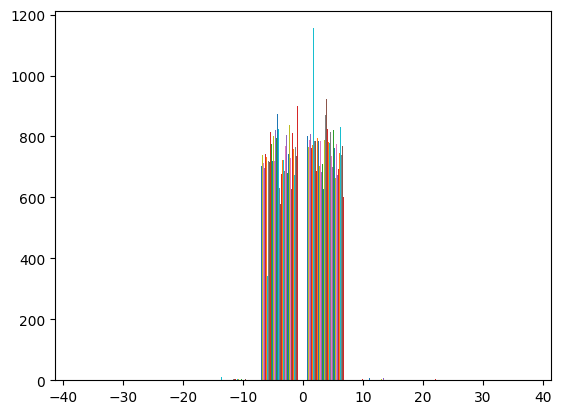

In [23]:
plt.hist(ica.transform(X))

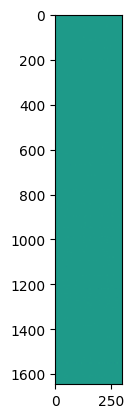

In [24]:
plt.imshow(ica.mixing_)